This notebook just tests all the functions in bw_lcow_functions.
It also includes some old treatment lcow calculating functions

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import geopandas as gp
import os
import math
from shapely.geometry import MultiPoint, Point, Polygon
from sklearn.cluster import DBSCAN

import haversine as hs
from watertap3.truck_pipe_cost_functions import elevation,pipe_costing
from IPython.display import clear_output
from watertap3.utils import watertap_setup, get_case_study, run_model 
from watertap3.utils import run_watertap3, run_model_no_print, run_and_return_model
from watertap3.utils.post_processing import get_results_table
from bw_lcow_functions import *
import matplotlib.colors as mcolors

In [3]:
state_alpha = 'CO'
bw_cluster_kmeans = create_cluster_id_df(state_alpha)
bw_cluster_kmeans.head(5)

[0 1]
[0 1 2 3]
[0 1 2 3 4 5]


,state_alpha,unique_site_ID,Latitude,Longitude,county_nm,well_depth_ft,well_yield,TDS_kgm3,elec_price,well_field_lcow,cluster_id,centers
0,CO,USGS-380540102464201,38.094452,-102.778809,Bent,26.0,0.028391,5.460000,0.074,0.038242,0,"[37.781408594594595, -102.3834332945946]"
1,CO,USGS-380510102193900,38.086121,-102.327965,Prowers,66.0,0.029021,4.540000,0.074,0.041310,0,"[37.781408594594595, -102.3834332945946]"
2,CO,USGS-373206102112600,37.535015,-102.191017,Baca,612.0,0.012618,0.544337,0.074,0.085831,0,"[37.781408594594595, -102.3834332945946]"
3,CO,USGS-373110102162000,37.519459,-102.272682,Baca,465.0,0.050472,0.588425,0.074,0.070503,0,"[37.781408594594595, -102.3834332945946]"
4,CO,FETH-381000N1023200.1,38.166667,-102.533361,Prowers,146.0,0.024535,2.980000,0.074,0.047844,0,"[37.781408594594595, -102.3834332945946]"


In [5]:
bw_cluster_kmeans = create_bw_cluster_subcluster_df(state_alpha, bw_cluster_kmeans)
bw_cluster_kmeans.head(5)

KeyboardInterrupt: 

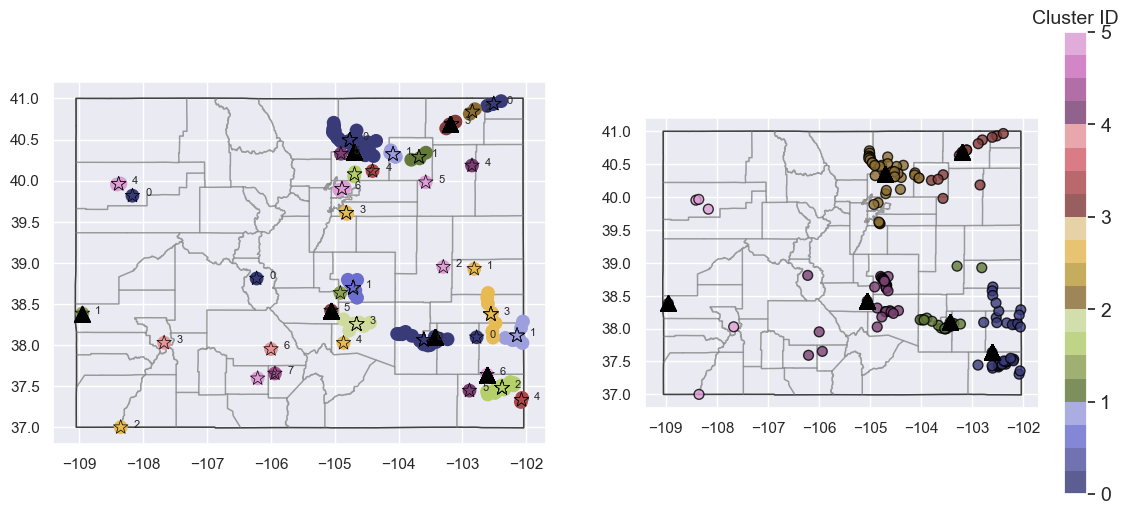

In [35]:
clustering_maps = plot_well_centroid(bw_cluster_kmeans)

In [36]:
condensed_subcluster_bw_df = condense_subcluster_table(bw_cluster_kmeans)
condensed_subcluster_bw_df.head(5)

,state_alpha,cluster_id,subcluster_id,centroid_lat,centroid_long,centroid_elev,subcluster_lat,subcluster_long,subcluster_elev,subcluster_centroid_dist,...,well_depth_ft,well_yield,total_well_yield,tds_kgm3,avg_TDS_kgm3,elec_price,well_field_lcow,avg_well_field_lcow,pipe_lcow,avg_subcluster_pipe_lcow
0,CO,0,0,37.638622,-102.614365,1301.880493,38.094452,-102.778809,1126.384277,52.701468,...,[26.0],[0.0283905899999999],0.028391,[5.46],5.460000,0.074,[0.0382419547997271],0.038242,[0.0],0.000000
1,CO,0,1,37.638622,-102.614365,1301.880493,38.115091,-102.146455,1063.276855,67.034048,...,"[66.0, 67.0, 50.0, 90.0, 33.0, 197.0, 140.0]","[0.0290214919999999, 0.0946352999999999, 0.126...",0.439739,"[4.54, 4.76, 4.56, 4.08, 2.97, 0.932, 0.6373343]",3.268398,0.074,"[0.0413098975610622, 0.038688358585095, 0.0364...",0.041201,"[0.3366120025220056, 0.10724839763158016, 0.11...",0.175511
2,CO,0,2,37.638622,-102.614365,1301.880493,37.479968,-102.379663,1231.817627,27.188691,...,"[612.0, 465.0, 650.0, 140.0, 325.0, 300.0, 224...","[0.0126180399999999, 0.0504721599999999, 0.063...",0.923010,"[0.5443371, 0.5884247, 0.5450259999999999, 0.5...",0.770567,0.074,"[0.0858306918444735, 0.0705032654278623, 0.084...",0.062630,"[0.5730894856540331, 0.18926575068051762, 0.21...",0.166684
3,CO,0,3,37.638622,-102.614365,1301.880493,38.375005,-102.555914,1188.907837,82.042120,...,"[146.0, 51.0, 16.0, 34.0, 46.0, 48.0, 36.0]","[0.024535077563972, 0.0188394349360278, 0.0127...",0.178034,"[2.98, 2.38, 1.19, 3.37, 1.12, 2.68, 5.42]",2.619024,0.074,"[0.0478441932618059, 0.0402782567830109, 0.037...",0.039783,"[0.48372837881979824, 0.3770880018530443, 0.87...",0.408726
4,CO,0,4,37.638622,-102.614365,1301.880493,37.331686,-102.076427,1125.804688,58.461215,...,"[430.0, 140.0]","[0.06939922, 0.0630902]",0.132489,"[0.5946245, 0.852]",0.717184,0.074,"[0.066910439077657, 0.0437013127168274]",0.055858,"[0.09231250202965093, 0.09587303888310554]",0.094008


In [37]:
condensed_cluster_bw_df = condense_cluster_table(condensed_subcluster_bw_df)
condensed_cluster_bw_df.head(5)

3 -> 0 -> 6 -> treatment_node
1 -> 0 -> 6 -> treatment_node
4 -> 2 -> 6 -> treatment_node
0 -> 6 -> treatment_node
5 -> 6 -> treatment_node
2 -> 6 -> treatment_node
6 -> treatment_node

Node: 4
Nodes included 4
Node: 1
Nodes included 1
Node: 3
Nodes included 3

Node: 2
Nodes included 2
Nodes included 4
Node: 5
Nodes included 5
Node: 0
Nodes included 0
Nodes included 1
Nodes included 3

Node: 6
Nodes included 6
Nodes included 2
Nodes included 5
Nodes included 0
1 -> 2 -> 0 -> treatment_node
2 -> 0 -> treatment_node
0 -> treatment_node

Node: 1
Nodes included 1

Node: 2
Nodes included 2
Nodes included 1

Node: 0
Nodes included 0
Nodes included 2
3 -> 6 -> 2 -> 5 -> 0 -> treatment_node
6 -> 2 -> 5 -> 0 -> treatment_node
1 -> 4 -> 2 -> 5 -> 0 -> treatment_node
4 -> 2 -> 5 -> 0 -> treatment_node
2 -> 5 -> 0 -> treatment_node
5 -> 0 -> treatment_node
0 -> treatment_node

Node: 1
Nodes included 1
Node: 3
Nodes included 3

Node: 4
Nodes included 4
Nodes included 1
Node: 6
Nodes included 6
Node

,state_alpha,cluster_id,centroid_lat,centroid_long,centroid_elev,subcluster_lat,subcluster_long,subcluster_elev,subcluster_centroid_dist,unique_site_ID,cluster_total_well_yield,cluster_avg_TDS_kgm3,elec_price,cluster_avg_well_field_lcow,cluster_avg_pipe_well_subcluster_lcow,cluster_avg_pipe_subcluster_cluster_lcow
0,CO,0,37.638622,-102.614365,1301.880493,"[38.0944519, 38.115091042857145, 37.4799681777...","[-102.7788086, -102.14645495714286, -102.37966...","[1126.384277344, 1063.276855469, 1231.81762695...","[52.70146790434681, 67.03404758128566, 27.1886...","USGS-380540102464201,USGS-380510102193900,USGS...",1.758443,1.657033,0.074,0.053707,0.179848,0.123439
1,CO,1,38.100000,-103.433361,1258.044800,"[38.063843028571426, 38.9261093, 38.95]","[-103.6036258904762, -102.8163147, -103.3000278]","[1269.255981445, 1355.845214844, 1448.97668457]","[15.435225377218577, 106.39673951170992, 95.22...","USGS-380029103363201,USGS-380218103243300,USGS...",0.860890,1.670178,0.074,0.036755,0.276066,0.184433
2,CO,2,40.353870,-104.702469,1425.649292,"[40.49410780384616, 40.321578974999994, 40.076...","[-104.76511518846154, -104.08738134999999, -10...","[1470.62109375, 1359.072021484, 1511.759399414...","[16.470733031824132, 52.256739567597684, 30.81...","USGS-402114104420701,USGS-401845104313701,USGS...",2.027211,1.615084,0.074,0.039380,0.232440,0.110444
3,CO,3,40.683876,-103.202431,1210.515991,"[40.935731233333335, 40.288320066666664, 40.84...","[-102.5108363, -103.68156076666666, -102.84580...","[1089.741210938, 1284.55090332, 1136.260131836...","[64.59224625609079, 59.803552925571644, 34.730...","USGS-405549102312800,USGS-405802102234101,USGS...",1.208668,1.597648,0.074,0.040508,0.097281,0.151553
4,CO,4,38.418888,-105.056931,1596.187378,"[38.80972, 38.69609387777778, 38.6338844, 38.2...","[-106.2225, -104.71044073888889, -104.9122009,...","[2633.952636719, 1692.537841797, 2188.45947265...","[110.19915152980604, 43.10240029025737, 27.019...","CO_GEOTH-16-03,USGS-384738104473801,USGS-38473...",1.927279,0.930538,0.074,0.039744,0.123002,0.106942


In [38]:
# The LCOW have a corrected basis
condensed_cluster_bw_df = calc_cluster_lcow(condensed_cluster_bw_df,dist_to_dwi = 16.0934)
condensed_cluster_bw_df.head(5)


Case Study = BIG SPRING
Scenario = DWI A


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MICROFILTRATION
REVERSE OSMOSIS
UV AOP
TREATED STORAGE
MUNICIPAL DRINKING
DEEP WELL INJECTION


=========================START WT3 MODEL RUN==========================
.................................

Degrees of Freedom: 2

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................
.................................

Degrees of Freedom: 2

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................

Case Study = BIG SPRING
Scenario = DWI A


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MICROFILTRATION
REVERSE OSMOSIS
UV AOP
TREATED STORAGE
MUNICIPAL DRINKING
DEEP WELL INJECTION

.................................

Degrees of Freedom: 2

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................
...............................

,state_alpha,cluster_id,centroid_lat,centroid_long,centroid_elev,subcluster_lat,subcluster_long,subcluster_elev,subcluster_centroid_dist,unique_site_ID,cluster_total_well_yield,cluster_avg_TDS_kgm3,elec_price,cluster_avg_well_field_lcow,cluster_avg_pipe_well_subcluster_lcow,cluster_avg_pipe_subcluster_cluster_lcow,treatment_lcow,cluster_pipe_brine_lcow,recovery,cluster_lcow
0,CO,0,37.638622,-102.614365,1301.880493,"[38.0944519, 38.115091042857145, 37.4799681777...","[-102.7788086, -102.14645495714286, -102.37966...","[1126.384277344, 1063.276855469, 1231.81762695...","[52.70146790434681, 67.03404758128566, 27.1886...","USGS-380540102464201,USGS-380510102193900,USGS...",1.758443,1.657033,0.074,0.058823,0.196981,0.135198,0.556912,0.016574,89.396102,0.964487
1,CO,1,38.100000,-103.433361,1258.044800,"[38.063843028571426, 38.9261093, 38.95]","[-103.6036258904762, -102.8163147, -103.3000278]","[1269.255981445, 1355.845214844, 1448.97668457]","[15.435225377218577, 106.39673951170992, 95.22...","USGS-380029103363201,USGS-380218103243300,USGS...",0.860890,1.670178,0.074,0.040257,0.302365,0.202003,0.582083,0.022035,89.670961,1.148741
2,CO,2,40.353870,-104.702469,1425.649292,"[40.49410780384616, 40.321578974999994, 40.076...","[-104.76511518846154, -104.08738134999999, -10...","[1470.62109375, 1359.072021484, 1511.759399414...","[16.470733031824132, 52.256739567597684, 30.81...","USGS-402114104420701,USGS-401845104313701,USGS...",2.027211,1.615084,0.074,0.043132,0.254582,0.120966,0.551607,0.015651,89.416079,0.985938
3,CO,3,40.683876,-103.202431,1210.515991,"[40.935731233333335, 40.288320066666664, 40.84...","[-102.5108363, -103.68156076666666, -102.84580...","[1089.741210938, 1284.55090332, 1136.260131836...","[64.59224625609079, 59.803552925571644, 34.730...","USGS-405549102312800,USGS-405802102234101,USGS...",1.208668,1.597648,0.074,0.044367,0.106548,0.165991,0.567176,0.019009,89.653516,0.903090
4,CO,4,38.418888,-105.056931,1596.187378,"[38.80972, 38.69609387777778, 38.6338844, 38.2...","[-106.2225, -104.71044073888889, -104.9122009,...","[2633.952636719, 1692.537841797, 2188.45947265...","[110.19915152980604, 43.10240029025737, 27.019...","CO_GEOTH-16-03,USGS-384738104473801,USGS-38473...",1.927279,0.930538,0.074,0.043530,0.134720,0.117130,0.530878,0.014359,90.859466,0.840617


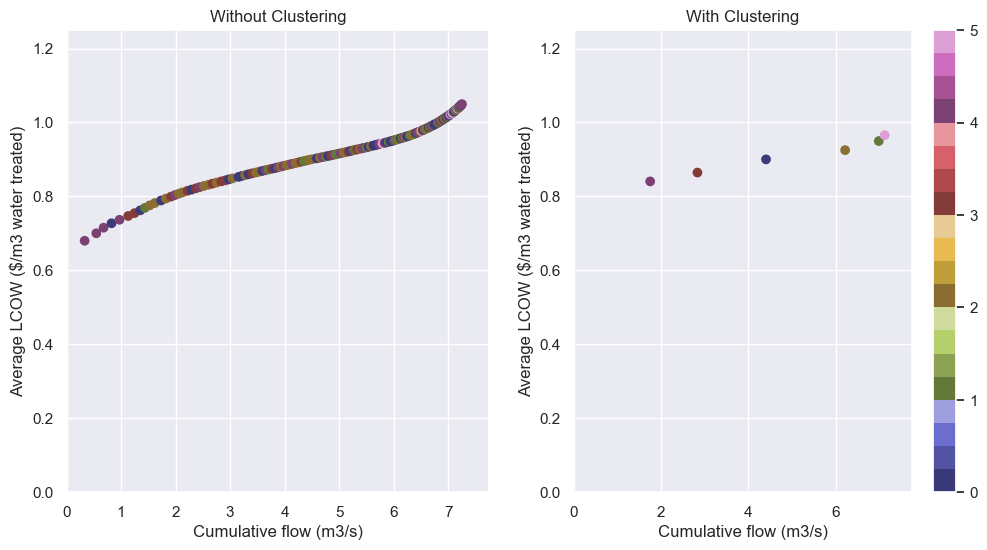

In [39]:
supply_curve = plot_supply_curve(bw_cluster_kmeans,condensed_cluster_bw_df,state_alpha)

In [40]:
# Saving Results

# Check if folder already exists
PATH = r'\Users\mhardika\Documents\AMO\GeoToolAll_Methods\Water Source Data\Brackish\clustering_results\\' + state_alpha
if not os.path.exists(PATH):
    os.makedirs(PATH)

bw_cluster_kmeans.to_csv(PATH + '\\' + state_alpha.lower()+'_bw_kmeans.csv')    
condensed_subcluster_bw_df.to_csv(PATH + '\\' + state_alpha.lower()+'_subcluster.csv')
condensed_cluster_bw_df.to_csv(PATH + '\\' + state_alpha.lower()+'_cluster.csv')
supply_curve.savefig(PATH + '\\' + state_alpha.lower()+'_supply_curve.jpg')
clustering_maps.savefig(PATH + '\\' + state_alpha.lower()+'_clustering.jpg')

Below is rough work which was consolidated into bw_lcow_functions.py

In [41]:
# Plot supply curve with and without clustering
# fig, (ax,ax1) = plt.subplots(1,2, figsize = (12,6))

# # Without clustering
# bw_df_temp_sorted_1 = bw_df[bw_df['state_alpha']==state_alpha].sort_values('lcow')
# colors = plt.cm.get_cmap('tab20b')
# cluster_id_list = []
# for well in bw_df_temp_sorted_1['unique_site_ID'].unique():
#     cluster_id_list.append(bw_cluster_kmeans[bw_cluster_kmeans['unique_site_ID']==well]['cluster_id'].values[0])

# # Calculating LCOW as a function of well yield without clustering
# flow = bw_df_temp_sorted_1['well_yield']*bw_df_temp_sorted_1['recovery']/100
# cum_flow_1 = flow.cumsum()

# lcow_t = bw_df_temp_sorted_1['lcow'] + bw_df_temp_sorted_1['pipe_lcow']
# cost = lcow_t*flow
# cum_cost_1 = cost.cumsum()

# avg_lcow = np.divide(cum_cost_1, cum_flow_1, out=np.zeros_like(cum_cost_1), where=cum_flow_1!=0) 

# ax.scatter(cum_flow_1,avg_lcow,c = cluster_id_list,cmap=colors)
# ax.set_title('Without Clustering')

# # With clustering
# condensed_cluster_bw_df_sort = condensed_cluster_bw_df.sort_values(by=['cluster_lcow'])

# flow = condensed_cluster_bw_df_sort['cluster_total_well_yield']*condensed_cluster_bw_df_sort['recovery']/100
# cum_flow = flow.cumsum()

# cost = condensed_cluster_bw_df_sort['cluster_lcow']*flow
# cum_cost = cost.cumsum()

# avg_lcow = np.divide(cum_cost, cum_flow) 

# ax1.set_title('With Clustering')
# sc = ax1.scatter(cum_flow,avg_lcow,c=condensed_cluster_bw_df_sort['cluster_id'].values,cmap=colors)
# # cbar = plt.colorbar(sc,ax=ax1)
# cbar = plt.colorbar(sc,ax=ax1,ticks = plt.MaxNLocator(len(condensed_cluster_bw_df_sort['cluster_id'].unique())-1))
# for a in (ax,ax1):
#     a.set_xlim([0,max(cum_flow_1)+0.5])
#     a.set_ylim([0,max(avg_lcow)+0.2])
#     a.set_ylabel('Average LCOW ($/m3 water treated)')
#     a.set_xlabel('Cumulative flow (m3/s)')

# print(max(avg_lcow))

In [42]:
# Read brackish water previous lcow file with locations

# bw_df = pd.read_csv('/Users/mhardika/Documents/AMO/GeoToolAll_Methods/Water Source Data/Brackish/brackish_sites_with_metrics_baseline_dwi_updated_costs_transport_updated_basis_1.csv')
# pp_combined_df = pd.read_csv(r'\Users\mhardika\Documents\AMO\MSD Workshop\data\pp_df.csv').drop(['Unnamed: 0'],axis=1)
# loc = [Point(xy) for xy in zip(pp_combined_df['PPLongitude'],pp_combined_df['PPLatitude'])]
# loc = gp.GeoDataFrame(geometry = loc, crs='EPSG:4326')
# pp_combined_df['geometry'] = loc

In [43]:
# Function to form clusters

# def form_cluster(df,n_clusters = 3):
#     kmeans = KMeans(n_clusters = n_clusters, init ='k-means++',random_state=42)
#     kmeans.fit(df[df.columns[2:4]])  # Compute k-means clustering.
#     df['cluster_id'] = kmeans.fit_predict(df[df.columns[2:4]])
#     centers = kmeans.cluster_centers_  # Coordinates of cluster centers.
#     labels = kmeans.predict(df[df.columns[2:4]])  # Labels of each point
#     centers_array = []
#     for idx,row in df.iterrows():
#         centers_array.append(centers[int(row['cluster_id'])])
#     df['centers'] = centers_array
    
#     return df

In [44]:
# Create a table with cluster ID

# bw_cluster_kmeans = pd.DataFrame()
# bw_state_df = pd.DataFrame()
# bw_state_df_loc = pd.DataFrame()

# for state in ['CT']: #bw_df['state_alpha'].unique():
#     # kmeans doesn't work for fewer than 3 points. Calculate centroid for these cases
#     print('State:',state)
#     bw_state_df = bw_df[bw_df['state_alpha'] == state].copy()
#     bw_state_df_loc = bw_state_df[['state_alpha','unique_site_ID','Latitude','Longitude','county_nm','well_depth_ft','well_yield','TDS_kgm3','elec_price','well_field_lcow']]

#     if len(bw_state_df)<=3:
#         bw_state_df_loc['cluster_id'] = 0
#         bw_state_df_loc['well_yield'] = bw_state_df['well_yield']
#         bw_cluster_kmeans = pd.concat([bw_cluster_kmeans,bw_state_df_loc])
#         continue 

#     # First pass at clustering for a state
#     # bw_state_df_loc = bw_state_df[['unique_site_ID','Latitude','Longitude']].copy()
#     bw_state_df_loc = form_cluster(bw_state_df_loc)

#     # Assign well yield
#     bw_state_df_loc['well_yield'] = bw_state_df['well_yield']
#     bw_state_df_loc = bw_state_df_loc.sort_values(['cluster_id'])

#     # print('Initial cluster list:',bw_state_df_loc['cluster_id'].unique())

#     # To keep track of clusters and new created clusters if the maximum capacity of a treatment plant is exceeded
#     prev_max_cluster_label = 0

#     # Dataframe for each state with their respective cluster id
#     cluster_state_df = pd.DataFrame()

#     for cluster_id in bw_state_df_loc['cluster_id'].unique():
#         cluster_sub_df = pd.DataFrame()
#         temp_df = pd.DataFrame()
#         # Check if maximum capacity of treatment plant is exceeded
#         well_yield_total = sum(bw_state_df_loc[bw_state_df_loc['cluster_id']==cluster_id]['well_yield'])

#         max_capacity = math.ceil(27.5*0.043813)  #---> Number is based on Carlsbad. Kay Bailey is 27.5 MGD
#         if well_yield_total > max_capacity: 
#             # If exceed increase number of clusters in the original cluster and redo
            
#             cluster_sub_df = bw_state_df_loc[bw_state_df_loc['cluster_id']==cluster_id].copy()

#             # print("Number of clusters required:", math.ceil(well_yield_total/max_capacity))
#             temp_df = form_cluster( cluster_sub_df, n_clusters = math.ceil(well_yield_total/max_capacity))
#             temp_df = temp_df.sort_values(['cluster_id'])
#             if cluster_id == 0:
#                 temp_df['cluster_id'].update(prev_max_cluster_label + temp_df['cluster_id'])
#             else:
#                 temp_df['cluster_id'].update(prev_max_cluster_label + temp_df['cluster_id'] + 1)
#             prev_max_cluster_label = max(temp_df['cluster_id'])
            
#             cluster_state_df = pd.concat([cluster_state_df,temp_df],ignore_index=True)
#         else:
#             # If maximum capacity is not exceeded add to state data frame
#             temp_bw_state_df_loc = bw_state_df_loc[bw_state_df_loc['cluster_id']==cluster_id].copy()
#             if cluster_id == 0:
#                temp_bw_state_df_loc['cluster_id'] = prev_max_cluster_label 
#             else:
#                temp_bw_state_df_loc['cluster_id'] = prev_max_cluster_label + 1

#             cluster_state_df = pd.concat([cluster_state_df,temp_bw_state_df_loc],ignore_index=True)
#             prev_max_cluster_label = max(cluster_state_df['cluster_id'])

#         print(cluster_state_df['cluster_id'].unique())
    
#     bw_cluster_kmeans = pd.concat([bw_cluster_kmeans,cluster_state_df])

In [45]:
# Function to find well closest to the center of the cluster
# def select_centroid(df):
#     max_dist = 1000
#     # well = df['unique_site_ID'][0]

#     for idx, row in df.iterrows():
#         bw_long = row['Longitude']
#         bw_lat = row['Latitude']

#         bw_loc = (bw_lat,bw_long)

#         cent_long = row['centers'][1]
#         cent_lat = row['centers'][0]
        
#         cent_loc = (cent_lat,cent_long)

#         dist_km = hs.haversine(cent_loc,bw_loc)

#         if dist_km < max_dist:
#             max_dist = dist_km
#             well = row['unique_site_ID']
    
#     return well
        

In [46]:
# Create subclusters to calculate pipe transport costs

# def find_centroid(coords,cluster_range = 5):
#     kms_per_radian = 6371.0088
#     range_km = cluster_range*1.609343502101154
#     epsilon = range_km/ kms_per_radian

#     db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
#     cluster_labels = db.labels_

#     # get the number of clusters
#     num_clusters = len(set(cluster_labels))

#     # turn the clusters in to a pandas series, where each element is a cluster of points
#     clusters = pd.Series((coords[cluster_labels==n] for n in range(num_clusters)))
#     centroids = []

#     for ea in clusters:
#         centroids.append((MultiPoint(ea).centroid.x, MultiPoint(ea).centroid.y))

#     centroids = np.array(centroids)
#     return [centroids,cluster_labels]

# def create_subcluster(state_df):
#     sub_cluster_df = pd.DataFrame(columns = ['sub_cluster_id','centroid'])

#     for cluster_id in state_df['cluster_id'].unique():
        
#         coords_input = state_df[state_df['cluster_id']==cluster_id][['Latitude', 'Longitude']].to_numpy()
#         centroids,cluster_labels = find_centroid(coords_input,10)

#         loc = [Point(xy) for xy in zip(centroids[:,1],centroids[:,0])]
#         loc = gp.GeoDataFrame(geometry = loc, crs='EPSG:4326')
#         loc.geometry = loc.geometry.to_crs('EPSG:4326')

#         # Assign cluster label
#         temp = pd.DataFrame(columns = ['sub_cluster_id','centroid'])
#         # temp['cluster_id'] = 0
#         temp['sub_cluster_id'] = cluster_labels
#         temp['centroid'] = loc.geometry[cluster_labels].values

#         sub_cluster_df= pd.concat([sub_cluster_df,temp])

#     return [sub_cluster_df['sub_cluster_id'].values.tolist(), 
#             sub_cluster_df['centroid'].values.x.tolist(), 
#             sub_cluster_df['centroid'].values.y.tolist()]

# Groups wells within 25 miles of each other

In [47]:
# Assign elevation to each well field, calculate distance between cluster center and other well fields in the cluster

# well_elevation_list = []
# centroid_elevation_list = []
# subcluster_elevation_list = []

# centroid_long_list = []
# centroid_lat_list = []
# sub_cluster_id_list = []
# sub_cluster_centroid_long_list = []
# sub_cluster_centroid_lat_list = []
# sub_cluster_dist_list = []

# for state in bw_cluster_kmeans.state_alpha.unique():
#     temp_state = bw_cluster_kmeans[bw_cluster_kmeans.state_alpha == state].copy()

#     for cluster_id in temp_state.cluster_id.unique():
#         temp_cluster = temp_state[temp_state.cluster_id==cluster_id].copy()
#         centroid_well = select_centroid(temp_cluster)
#         # print(centroid_well)

#         centroid_long = temp_cluster[temp_cluster['unique_site_ID']==centroid_well]['Longitude'].values[0]
#         centroid_lat = temp_cluster[temp_cluster['unique_site_ID']==centroid_well]['Latitude'].values[0]

#         [sub_cluster_id,sub_cluster_centroid_long,sub_cluster_centroid_lat] = create_subcluster(temp_state)

#         for well in temp_cluster['unique_site_ID'].unique():
#             bw_long = temp_cluster[temp_cluster['unique_site_ID']==well]['Longitude'].values[0]
#             bw_lat = temp_cluster[temp_cluster['unique_site_ID']==well]['Latitude'].values[0]

#             well_elevation_list.append(elevation(bw_lat,bw_long))
#             centroid_long_list.append(centroid_long)
#             centroid_lat_list.append(centroid_lat) 
#             centroid_elevation_list.append(elevation(centroid_lat,centroid_long))

#     sub_cluster_id_list.extend(sub_cluster_id)
#     sub_cluster_centroid_long_list.extend(sub_cluster_centroid_long)
#     sub_cluster_centroid_lat_list.extend(sub_cluster_centroid_lat)

# bw_cluster_kmeans['well_elevation'] = well_elevation_list
# bw_cluster_kmeans['centroid_long'] = centroid_long_list
# bw_cluster_kmeans['centroid_lat'] = centroid_lat_list
# bw_cluster_kmeans['centroid_elevation'] = centroid_elevation_list
# bw_cluster_kmeans['sub_cluster_id'] = sub_cluster_id_list
# bw_cluster_kmeans['sub_cluster_long'] = sub_cluster_centroid_long_list
# bw_cluster_kmeans['sub_cluster_lat'] = sub_cluster_centroid_lat_list

# Add distance between sub-cluster centroid and cluster centroid

# for idx, row in bw_cluster_kmeans.iterrows():
#     sub_cluster_loc = (row['sub_cluster_lat'],row['sub_cluster_long'])
#     cent_loc = (row['centroid_lat'],row['centroid_long'])

#     dist_km = hs.haversine(cent_loc,sub_cluster_loc)
#     sub_cluster_dist_list.append(dist_km)

#     subcluster_elevation_list.append(elevation(row['sub_cluster_lat'],row['sub_cluster_long']))

# bw_cluster_kmeans['sub_cluster_to centroid_dist_km'] = sub_cluster_dist_list
# bw_cluster_kmeans['subcluster_elevation'] = subcluster_elevation_list

# bw_cluster_kmeans.head(20)

In [48]:
# Add cost of pipe transport from well to the subcluster centroid
# pipe_lcow_well_subcluster_list = []

# for idx, row in bw_cluster_kmeans.iterrows():

#     # Distance between subcluster centroid and well
#     sub_cluster_loc = (row['sub_cluster_lat'],row['sub_cluster_long'])
#     well_loc = (row['Latitude'],row['Longitude'])
#     dist_km_well = hs.haversine(well_loc,sub_cluster_loc)

#     # Elevation gain between subcluster centroid and well
#     elev_gain = row['well_elevation'] - row['subcluster_elevation']

#     if elev_gain<0:
#         elev_gain = 1e-5    

#     pipe_lcow_well_subcluster = pipe_costing(row['well_yield']*3600*24, dist_km_well,
#                                              elev_gain=elev_gain,electricity_rate=row['elec_price'])
    
#     pipe_lcow_well_subcluster_list.append(pipe_lcow_well_subcluster)

# bw_cluster_kmeans['pipe_lcow_well_subcluster'] = pipe_lcow_well_subcluster_list


In [49]:
# Condense to subcluster level
# calc_avg_tds = lambda x: np.average(x, weights=bw_cluster_kmeans.loc[x.index, "well_yield"])
# calc_well_field_lcow = lambda x: np.average(x, weights=bw_cluster_kmeans.loc[x.index, "well_yield"])
# calc_pipe_lcow = lambda x: np.average(x, weights=bw_cluster_kmeans.loc[x.index, "well_yield"])

# cluster_df = pd.DataFrame()

# Condense to cluster level
# for state in bw_cluster_kmeans['state_alpha'].unique():
#     temp_df = bw_cluster_kmeans[bw_cluster_kmeans['state_alpha']==state]
#     for cluster in temp_df['cluster_id'].unique():
#         temp_cluster_df = temp_df[temp_df['cluster_id']==cluster]

#         group_table  = temp_cluster_df.groupby(['state_alpha','cluster_id','sub_cluster_id']).agg(
#                 centroid_lat = ('centroid_lat','mean'),
#                 centroid_long = ('centroid_long','mean'),
#                 centroid_elev = ('centroid_elevation','mean'),

#                 subcluster_lat = ('sub_cluster_lat','mean'),
#                 subcluster_long = ('sub_cluster_long','mean'),
#                 subcluster_elev = ('subcluster_elevation','mean'),
#                 subcluster_centroid_dist = ('sub_cluster_to centroid_dist_km','mean'),

#                 unique_site_ID = ('unique_site_ID',','.join),
#                 well_lat = ('Latitude', pd.Series.to_list),
#                 well_long = ('Longitude',pd.Series.to_list),
#                 county_nm = ('county_nm',pd.Series.to_list),
#                 well_elevation = ('well_elevation',pd.Series.to_list),
#                 well_depth_ft = ('well_depth_ft', pd.Series.to_list),
#                 well_yield = ('well_yield',pd.Series.to_list),
#                 total_well_yield = ('well_yield','sum'),
#                 tds_kgm3 = ('TDS_kgm3',pd.Series.to_list),
#                 avg_TDS_kgm3 = ('TDS_kgm3', calc_avg_tds),
#                 elec_price = ('elec_price','mean'),
#                 well_field_lcow = ('well_field_lcow',pd.Series.to_list),
#                 avg_well_field_lcow = ('well_field_lcow',calc_well_field_lcow),
#                 pipe_lcow = ('pipe_lcow_well_subcluster', pd.Series.to_list),
#                 avg_subcluster_pipe_lcow = ('pipe_lcow_well_subcluster', calc_pipe_lcow),

#                ).reset_index()

#         cluster_df = pd.concat((cluster_df,group_table))
# cluster_df.reset_index(inplace=True)
# cluster_df.head(10)
# check


In [50]:
# Condense to cluster level
# Inline functions to calculate weighted average tds and lcows
# calc_avg_tds = lambda x: np.average(x, weights=cluster_df.loc[x.index, "total_well_yield"])
# calc_well_field_lcow = lambda x: np.average(x, weights=cluster_df.loc[x.index, "total_well_yield"])
# calc_pipe_lcow = lambda x: np.average(x, weights=cluster_df.loc[x.index, "total_well_yield"])

# cluster_bw_df = pd.DataFrame()
# # Condense the table further to the cluster level
# for cluster in cluster_df['cluster_id'].unique():
#     temp_df = cluster_df[cluster_df['cluster_id'] == cluster]

#     group_table  = temp_df.groupby(['state_alpha','cluster_id']).agg(
#             centroid_lat = ('centroid_lat','mean'),
#             centroid_long = ('centroid_long','mean'),
#             centroid_elev = ('centroid_elev','mean'),

#             subcluster_lat = ('subcluster_lat',pd.Series.to_list),
#             subcluster_long = ('subcluster_long',pd.Series.to_list),
#             subcluster_elev = ('subcluster_elev',pd.Series.to_list),
#             subcluster_centroid_dist = ('subcluster_centroid_dist',pd.Series.to_list),

#             cluster_total_well_yield = ('total_well_yield','sum'),
#             cluster_avg_TDS_kgm3 = ('avg_TDS_kgm3', calc_avg_tds),
#             elec_price = ('elec_price','mean'),
#             cluster_avg_well_field_lcow = ('avg_well_field_lcow',calc_well_field_lcow),
#             cluster_avg_pipe_lcow = ('avg_subcluster_pipe_lcow', calc_pipe_lcow),

#         ).reset_index()

#     cluster_bw_df = pd.concat((cluster_bw_df,group_table))

# cluster_bw_df

In [51]:
# pipe_lcow_subcluster_centroid_list = []
# for cluster in cluster_df['cluster_id'].unique()[0:1]:
#     temp_df = cluster_df[cluster_df['cluster_id'] == cluster]
#     for subcluster in temp_df['sub_cluster_id'].unique()[0:1]:
#         print(temp_df[temp_df['sub_cluster_id']==subcluster]['subcluster_centroid_dist'].values[0])
#         print(temp_df[temp_df['sub_cluster_id']==subcluster]['subcluster_elev'].values[0])
#         print(temp_df[temp_df['sub_cluster_id']==subcluster]['centroid_elev'].values[0])
#         print(temp_df[temp_df['sub_cluster_id']==subcluster]['total_well_yield'].values[0])
#         pipe_costing()

In [52]:
# bw_cluster_kmeans.to_csv(r'\Users\mhardika\Documents\AMO\ct_kmeans_28Nov23.csv')

In [53]:
# Sort data in decreasing order of well yield
# bw_cluster_kmeans_sorted = bw_cluster_kmeans.sort_values(['state_alpha','cluster_id','well_yield'],
#                                                          ascending=[True,True,False]).groupby(['state_alpha','cluster_id']).apply(pd.DataFrame)
# bw_cluster_kmeans_sorted.reset_index(inplace=True,drop=True)
# bw_cluster_kmeans_sorted.head(2)

In [54]:
# temp_state =  bw_cluster_kmeans_sorted[bw_cluster_kmeans_sorted.state_alpha == 'WI']
# temp_cluster = temp_state[temp_state.cluster_id==0]
# centroid_well = temp_cluster[temp_cluster['dist_km']==0]['unique_site_ID'].values[0]

# temp_cluster[temp_cluster['unique_site_ID']==centroid_well]['well_elevation'].values[0]


In [55]:
# Function to calculate LCOW

# def treatment_only_LCOW(capacity,tds, well_depth, elec_price):
#     case_study = 'big_spring'
#     scenario = 'dwi_a'
#     desired_recovery = 1
#     ro_bounds = 'other' # or 'seawater'

#     m = watertap_setup(case_study=case_study, scenario=scenario)
#     m = get_case_study(m=m)
#     m = run_watertap3(m, desired_recovery=desired_recovery, ro_bounds=ro_bounds)

#     m.fs.reverse_osmosis.membrane_area.unfix()
#     m.fs.reverse_osmosis.feed.pressure.unfix()

#     m.fs.big_spring_feed.flow_vol_in.fix(capacity) # capacity in m3s
#     m.fs.big_spring_feed.conc_mass_in[0, 'tds'].fix(tds) # tds in kg/m3
#     m.fs.well_field.lift_height.fix(well_depth)

#     m.fs.costing_param.electricity_price = elec_price 
#     m = run_and_return_model(m, objective=True,print_it=True)
#     m, df = get_results_table(m=m, case_study='test', scenario=scenario)    
#     lcow = m.fs.costing.LCOW.value()
#     well_field_lcow = m.fs.well_field.LCOW()
#     recovery = m.fs.costing.system_recovery()*100
#     # clear_output(wait=True)
#     # print(well_field_lcow)
#     # Exclude the well field LCOW from the cost ($/m3 avg well field flow), well lcow ($/m3 of only that well) and brine volume in m3/day
#     return (lcow-well_field_lcow,recovery, m.fs.deep_well_injection.flow_vol_in[0].value*3600*24)

# treatment_only_LCOW(0.277597,1.760000,1975,0.0545)

In [56]:
# Calculate cumulative well yield, cumulative tds, lcow without well field, pipe lcow to treatment, brine lcow
# bw_cluster_lcow = bw_cluster_kmeans_sorted.copy()

# avg_well_yield_list = []
# avg_tds_list = []
# treatment_lcow_list = []
# recovery_list = []
# brine_vol_list = []
# pipe_lcow_list = []
# brine_lcow_list = []

# dist_to_dwi = 16.0934 # = 10 miles

# for state in bw_cluster_kmeans_sorted.state_alpha.unique():
#     temp_state = bw_cluster_kmeans_sorted[bw_cluster_kmeans_sorted.state_alpha == state].copy()
    
#     for cluster_id in temp_state.cluster_id.unique():
#         temp_cluster = temp_state[temp_state.cluster_id==cluster_id].copy()
#         avg_well_yield = 0
#         avg_tds = 0
        
#         centroid_well = temp_cluster[temp_cluster['dist_km']==0]['unique_site_ID'].values[0]
#         centroid_elev = temp_cluster[temp_cluster['unique_site_ID']==centroid_well]['well_elevation'].values[0]
#         print(centroid_elev)

#         for well in temp_cluster['unique_site_ID'].unique():
#             # Calculate average well yield
#             avg_well_yield_old = avg_well_yield
#             avg_well_yield = avg_well_yield + temp_cluster[temp_cluster['unique_site_ID']==well]['well_yield'].values[0]

#             # Calculate average TDS
#             avg_tds = ((avg_tds*avg_well_yield_old 
#                        + temp_cluster[temp_cluster['unique_site_ID']==well]['TDS_kgm3'].values[0] *temp_cluster[temp_cluster['unique_site_ID']==well]['well_yield'].values[0])
#                         /avg_well_yield)
            
#             avg_well_yield_list.append(avg_well_yield)
#             avg_tds_list.append(avg_tds)

#             treatment_lcow, recovery, brine_flow = treatment_only_LCOW(avg_well_yield, avg_tds, 
#                                                                   temp_cluster[temp_cluster['unique_site_ID']==well]['well_depth_ft'].values[0],
#                                                                   temp_cluster[temp_cluster['unique_site_ID']==well]['elec_price'].values[0])
            
#             treatment_lcow_list.append(treatment_lcow)
#             recovery_list.append(recovery)
#             brine_vol_list.append(brine_flow)

#             elev_gain = centroid_elev - temp_cluster['well_elevation'].values[0] 

#             if elev_gain <= 0:
#                 elev_gain = 1e-5
#             pipe_lcow = pipe_costing(avg_well_yield*3600*24, temp_cluster[temp_cluster['unique_site_ID']==well]['dist_km'].values[0], elev_gain = elev_gain,
#                                       electricity_rate = temp_cluster[temp_cluster['unique_site_ID']==well]['elec_price'].values[0])/(recovery/100)

#             pipe_lcow_list.append(pipe_lcow)

#             brine_transport_lcow = (pipe_costing(brine_flow, dist_to_dwi, elev_gain = 1e-5, 
#                                                  electricity_rate = temp_cluster[temp_cluster['unique_site_ID']==well]['elec_price'].values[0])
#                                         *(100-recovery)/recovery)
            
#             brine_lcow_list.append(brine_transport_lcow)
            
# bw_cluster_lcow['avg_well_yield_m3/s'] = avg_well_yield_list
# bw_cluster_lcow['avg_tds'] = avg_tds_list
# bw_cluster_lcow['treatment_lcow'] = treatment_lcow_list
# bw_cluster_lcow['recovery'] = recovery_list
# bw_cluster_lcow['brine_vol_m3/day'] = brine_vol_list
# bw_cluster_lcow['pipe_to_treatment_lcow'] = pipe_lcow_list
# bw_cluster_lcow['brine_dwi_lcow'] = brine_lcow_list

# bw_cluster_lcow.head(3)

In [57]:
# bw_cluster_lcow['cluster_lcow'] = bw_cluster_lcow['treatment_lcow'] + \
#                 bw_cluster_lcow['well_field_lcow']*bw_cluster_lcow['well_yield']/(bw_cluster_lcow['avg_well_yield_m3/s']*bw_cluster_lcow['recovery']/100) + \
#                 bw_cluster_lcow['brine_dwi_lcow'] +\
#                 bw_cluster_lcow['pipe_to_treatment_lcow']

In [58]:
# bw_cluster_lcow_sorted = bw_cluster_lcow.sort_values(['state_alpha','cluster_id','cluster_lcow'],ascending=[True,True,True]).groupby(['state_alpha','cluster_id']).apply(pd.DataFrame)
# bw_cluster_lcow_sorted.reset_index(inplace=True,drop=True)
# bw_cluster_lcow.head(6)

In [59]:
# bw_cluster_lcow.to_csv(r'\Users\mhardika\Documents\AMO\tx_kmeans_lcow_8Nov23.csv')

In [60]:
# fig, ax = plt.subplots()

# state_cluster_lcow = bw_cluster_lcow_sorted[bw_cluster_lcow_sorted['state_alpha']=='WI']

# for cluster in state_cluster_lcow['cluster_id'].unique():
#     temp = state_cluster_lcow[state_cluster_lcow['cluster_id']==cluster]
#     ax.scatter(temp['avg_well_yield_m3/s'].cumsum(),temp['cluster_lcow'],label = cluster)

# ax.legend()

In [61]:
# bw_df_temp_sorted_1 = bw_df[bw_df['state_alpha']=='WI'].sort_values('lcow')

# lcow = 0
# total_water = 0

# fig, ax = plt.subplots()

# # Calculating LCOW as a function of well yield without clustering
# flow = bw_df_temp_sorted_1['well_yield']*bw_df_temp_sorted_1['recovery']/100
# cum_flow = flow.cumsum()

# lcow_t = bw_df_temp_sorted_1['lcow'] + bw_df_temp_sorted_1['pipe_lcow']
# cost = lcow_t*flow
# cum_cost = cost.cumsum()

# avg_lcow = np.divide(cum_cost, cum_flow, out=np.zeros_like(cum_cost), where=cum_flow!=0) 

# ax.scatter(cum_flow,avg_lcow)
# ax.set_xlim([0,2])

In [62]:
# wacc = 0.05
# plant_lifetime_yrs =30
# capital_recovery_factor = (wacc * (1 + wacc) ** plant_lifetime_yrs) / (((1 + wacc) ** plant_lifetime_yrs) - 1)
# capital_recovery_factor